In [1]:
from matplotlib import pyplot as plt
from pandas.tools.plotting import table
import subprocess
%matplotlib inline
import re
from functools import reduce
from tqdm import tqdm
import pandas as pd
import os
import collections
import scipy.stats
import numpy as np
import scipy
import csv
import math
from scipy import interp
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import subprocess
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import re
import seaborn as sns
from functools import reduce
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
dset=pd.read_csv ("clintab_GMQL/gencode.gene.info.v22.tsv", delimiter='\t')
gruppo=dset.groupby(['gene_type'])
proteingroup=gruppo.get_group('protein_coding')
lista1=set(proteingroup['gene_id'])
#len(proteingroup)

In [3]:
dset_rna_res=pd.read_csv("clintab_GMQL/res_seq/res_rna_seq.csv", delimiter='\t')
dset_rna_res.head()

,patient,chrom,start,stop,ensemble_id,entrez_id,gene_symbol,fpkm_uq,fpkm
0,R_00000,chr1,11868,14409,ENSG00000223972.5,100287102.0,DDX11L1,0.000000,0.000000
1,R_00000,chr1,14403,29570,ENSG00000227232.5,653635.0,WASH7P,43738.644775,1.695909
2,R_00000,chr1,17368,17436,ENSG00000278267.1,102465910.0,MIR6859-3,114591.291062,4.443128
3,R_00000,chr1,29553,31109,ENSG00000243485.3,NaN,RP11-34P13.3,635.994759,0.024660
4,R_00000,chr1,30365,30503,ENSG00000274890.1,100422831.0,MIR1302-9,0.000000,0.000000


In [4]:
dset_rna_senl=pd.read_csv("clintab_GMQL/sens_long_32/sens_long_32_rna_seq.csv", delimiter='\t')
#dset_rna_senl.head()

In [5]:
dset_rna_sens=pd.read_csv("clintab_GMQL/sens_short_6_32/sens_short_6_32_rna_seq.csv", delimiter='\t')
#lista=set(dset_rna_res['ensemble_id'])
#dset_rna_sens.head()

In [6]:
dset_res = dset_rna_res[dset_rna_res.ensemble_id.isin(lista1)]
protein_coding_res=pd.DataFrame(dset_res)
protein_coding_res['genes'] = protein_coding_res['ensemble_id']+'-'+ protein_coding_res['gene_symbol']
#protein_coding_res.head()
#protein coding

In [7]:
dset_senl = dset_rna_senl[dset_rna_senl.ensemble_id.isin(lista1)]
protein_coding_senl=pd.DataFrame(dset_senl)
protein_coding_senl['genes'] = protein_coding_senl['ensemble_id']+'-'+ protein_coding_senl['gene_symbol']
#protein_coding_senl.head()

In [8]:
dset_sens = dset_rna_sens[dset_rna_sens.ensemble_id.isin(lista1)]
protein_coding_sens=pd.DataFrame(dset_sens)
protein_coding_sens['genes'] = protein_coding_sens['ensemble_id']+'-'+ protein_coding_sens['gene_symbol']
#protein_coding_sens.head()

In [9]:
newdf = protein_coding_sens[['patient', 'genes', 'fpkm']]
sens=pd.DataFrame(newdf, columns=['patient', 'genes', 'fpkm'])
#sens.head()

In [10]:
newdf1 = protein_coding_senl[['patient', 'genes', 'fpkm']]
senl=pd.DataFrame(newdf1, columns=['patient', 'genes', 'fpkm'])
#senl.head()

In [11]:
newdf2 = protein_coding_res[['patient', 'genes', 'fpkm']]
res=pd.DataFrame(newdf2, columns=['patient', 'genes', 'fpkm'])
#res.head()
#res.dtypes

In [12]:
resdf=res.pivot(index="patient", columns="genes", values="fpkm")
#resdf.head()

In [13]:
senldf=senl.pivot(index="patient", columns="genes", values="fpkm")
#senldf.head()

In [14]:
sensdf=sens.pivot(index="patient", columns="genes", values="fpkm")
#sensdf.head()

In [15]:
list_pv=[]


for g in (resdf.columns): 
    c1=resdf[g].values
    c2=senldf[g].values
    m1=np.median(c1)
    m2=np.median(c2)
    
    if m1==0.0 and m2==0.0:
        pass
    else:
    
        try: 

            #pv=scipy.stats.ttest_ind(c1,c2).pvalue
            pv=scipy.stats.mannwhitneyu(c1,c2).pvalue
            #pv=scipy.stats.wilcoxon(c1,c2).value
            if pv<0.001:
                list_pv.append((g,pv,m1,m2))
                #print(g,pv,m1,m2)

        except:
            pass

In [16]:
results=sorted(list_pv, key=lambda x:x[1])
len(results)


#for h in ["\t".join(map (str,list(x))) for x in results]:
     
dataset_result=pd.DataFrame(results)

In [19]:
type(dataset_result)

pandas.core.frame.DataFrame

In [22]:
dataset_result.head()

,0,1,2,3
0,ENSG00000081026.17-MAGI3,0.000053,2.004508,3.137310
1,ENSG00000137393.9-RNF144B,0.000065,8.484803,15.532160
2,ENSG00000134504.11-KCTD1,0.000086,6.369336,10.695657
3,ENSG00000151812.13-SLC35F4,0.000091,0.005034,0.015873
4,ENSG00000137364.4-TPMT,0.000117,10.070143,13.108867


In [72]:
dataset_result["sum"]=dataset_result[2]+dataset_result[3]
new_ds=dataset_result[dataset_result["sum"]>10]
#new_ds.shape
new_ds.columns=['ensemble_id', 'p_value', 'median_SenL', 'median_SenS', 'sum']

#ax = plt.subplot(111, frame_on=False) # no visible frame
#ax.xaxis.set_visible(False)  # hide the x axis
#ax.yaxis.set_visible(False)  # hide the y axis

#table(ax, new_ds)  # where df is your data frame

#plt.savefig('mytable.png')

In [73]:
names=[]

for x in ["-".join(x.strip().split("-")[1:])  for x in (new_ds['ensemble_id'])]:
    names.append(x)   
    
    names=[]

for x in ["-".join(x.strip().split("-")[1:])  for x in (significant_genes['gene'])]:
    names.append(x)   

In [74]:
new_ds['gene_symbol']=names
#new_ds.to_csv('geni_SenL_SenS.csv', sep=',', header=True, index=False)

/home/lalli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
listageni=new_ds['ensemble_id'].values
listageni

array(['ENSG00000137393.9-RNF144B', 'ENSG00000134504.11-KCTD1',
       'ENSG00000137364.4-TPMT', 'ENSG00000090520.9-DNAJB11',
       'ENSG00000177383.4-MAGEF1', 'ENSG00000276180.1-HIST1H4I',
       'ENSG00000143013.11-LMO4', 'ENSG00000119888.9-EPCAM',
       'ENSG00000085276.16-MECOM', 'ENSG00000124659.6-TBCC',
       'ENSG00000155660.9-PDIA4', 'ENSG00000197903.7-HIST1H2BK',
       'ENSG00000114315.3-HES1', 'ENSG00000106144.18-CASP2',
       'ENSG00000008952.15-SEC62', 'ENSG00000073803.12-MAP3K13',
       'ENSG00000139629.14-GALNT6', 'ENSG00000071967.10-CYBRD1',
       'ENSG00000198162.11-MAN1A2', 'ENSG00000105825.10-TFPI2',
       'ENSG00000156298.11-TSPAN7', 'ENSG00000197323.9-TRIM33',
       'ENSG00000060339.12-CCAR1', 'ENSG00000105875.12-WDR91',
       'ENSG00000055130.14-CUL1'], dtype=object)

/home/lalli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  
/home/lalli/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


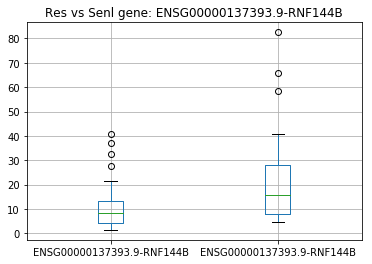

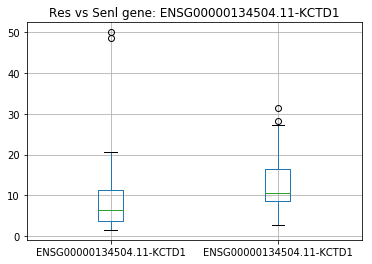

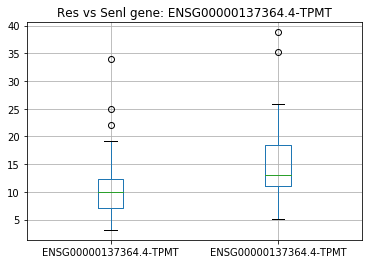

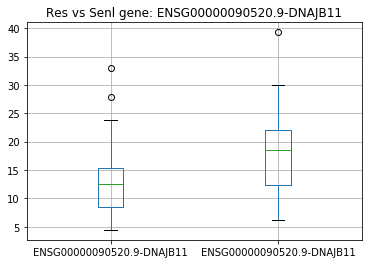

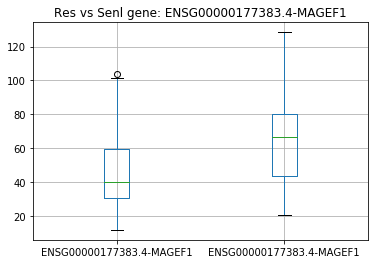

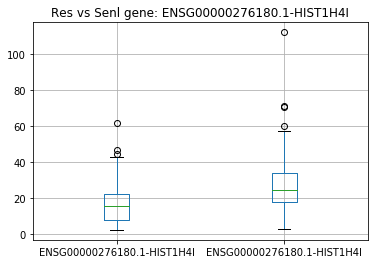

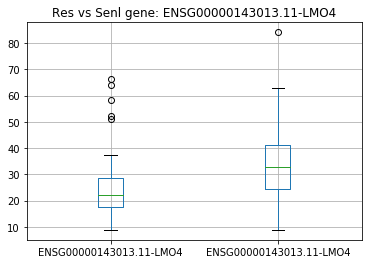

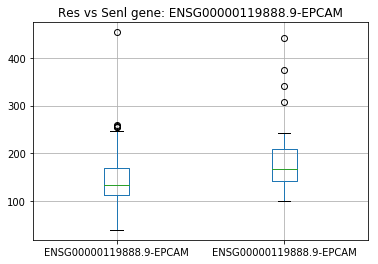

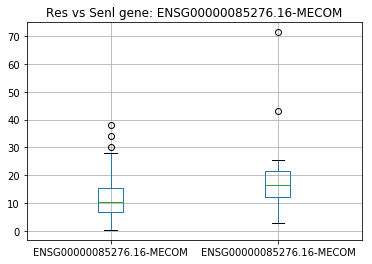

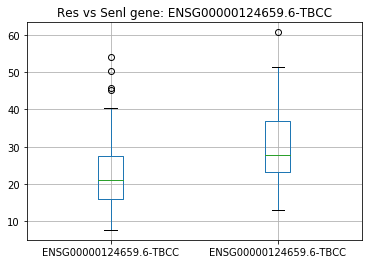

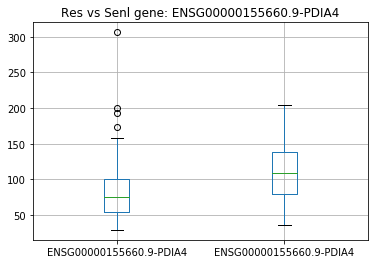

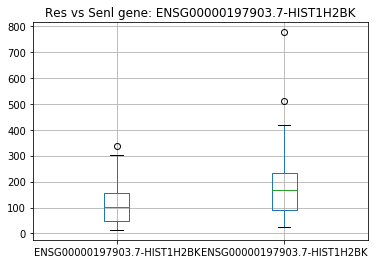

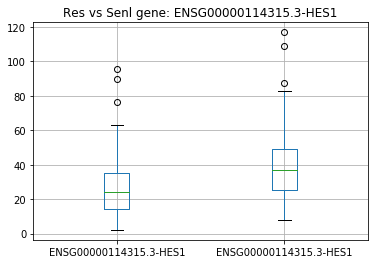

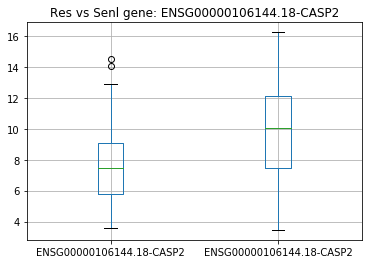

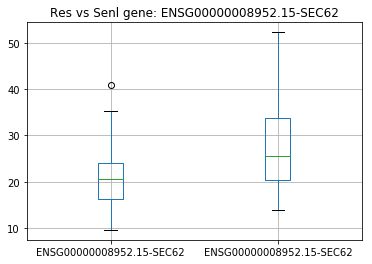

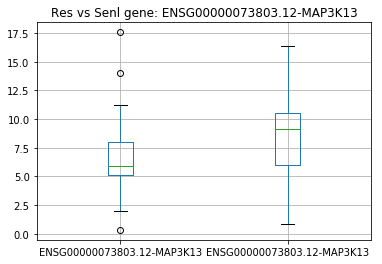

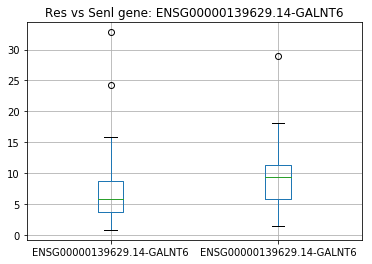

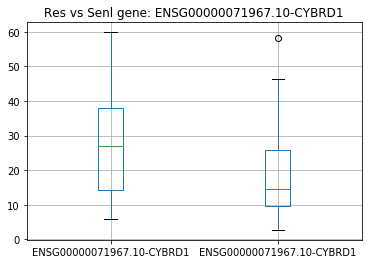

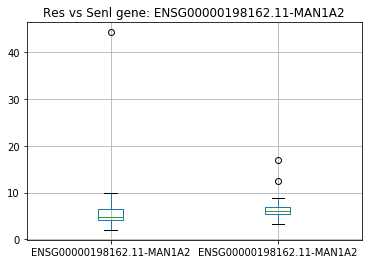

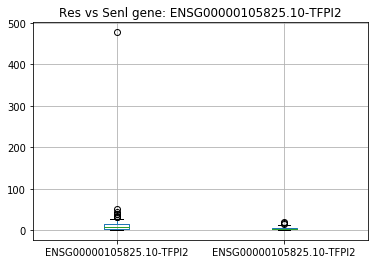

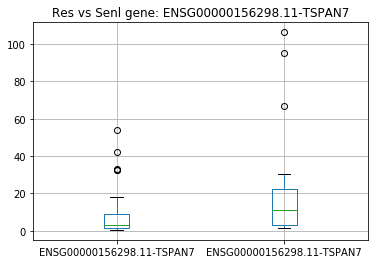

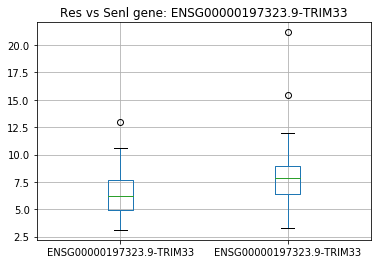

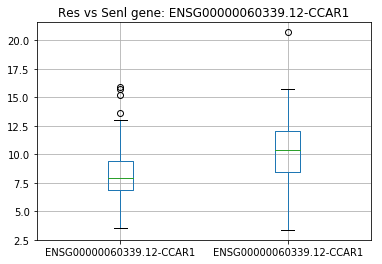

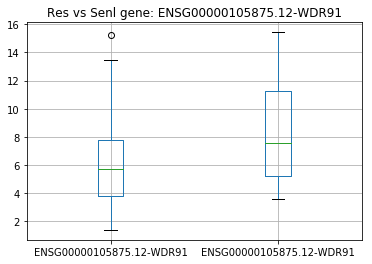

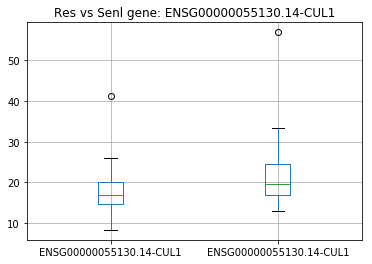

In [76]:
for g in listageni:

    boxplot1=pd.DataFrame(resdf, columns=[g])
    boxplot2=pd.DataFrame(senldf, columns=[g])
    fig, ax= plt.subplots()
    boxplot3=pd.concat([boxplot1, boxplot2], axis=1)
    ax.set_title('Res vs Senl gene: '+ g)

    boxplot_tot=boxplot3.boxplot()
    #plt.savefig('boxplot{}.png'.format(g))

In [23]:
column=(dataset_result[0])
column

0         ENSG00000081026.17-MAGI3
1        ENSG00000137393.9-RNF144B
2         ENSG00000134504.11-KCTD1
3       ENSG00000151812.13-SLC35F4
4           ENSG00000137364.4-TPMT
5          ENSG00000100084.13-HIRA
6           ENSG00000104290.9-FZD3
7           ENSG00000163251.3-FZD5
8        ENSG00000090520.9-DNAJB11
9     ENSG00000281674.1-AC087651.2
10       ENSG00000187783.10-TMEM72
11        ENSG00000177383.4-MAGEF1
12        ENSG00000125864.10-BFSP1
13      ENSG00000276180.1-HIST1H4I
14         ENSG00000143013.11-LMO4
15         ENSG00000119888.9-EPCAM
16        ENSG00000085276.16-MECOM
17          ENSG00000124659.6-TBCC
18         ENSG00000155660.9-PDIA4
19         ENSG00000172572.6-PDE3A
20     ENSG00000183578.5-TNFAIP8L3
21     ENSG00000197903.7-HIST1H2BK
22        ENSG00000204983.11-PRSS1
23          ENSG00000114315.3-HES1
24        ENSG00000125046.13-SSUH2
25        ENSG00000163554.10-SPTA1
26        ENSG00000106144.18-CASP2
27        ENSG00000008952.15-SEC62
28      ENSG00000073

In [ ]:
senl_selected=senldf[column]
senl_selected["label"]=1
senl_selected.shape

In [ ]:
sens_selected=sensdf[column]
sens_selected["label"]=0
sens_selected.shape

In [ ]:
#concatenated=pd.concat([res_selected, senl_selected])
#concatenated=pd.concat([res_selected, sens_selected])
concatenated=pd.concat([senl_selected, sens_selected])

In [ ]:
X=concatenated[concatenated.columns[:-1]].values
y=concatenated[concatenated.columns[-1]].values

In [ ]:
precision=[]
recall=[]

#loo = LeaveOneOut()
#loo.get_n_splits(X)
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=20, random_state=36851234)
for train_index, test_index in (rskf.split(X, y)) :
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

clf = svm.SVC(kernel='rbf', class_weight='balanced')
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

    clf.fit(X_train, y_train)
    y_predict=clf.predict(X_test)
    
    precision.append(precision_score(y_test, y_predict))
    recall.append(recall_score(y_test, y_predict))

In [ ]:
# ROC curve
#classifier = RandomForestClassifier(n_estimators=200, max_depth=15, class_weight='balanced')
#classifier = AdaBoostClassifier(n_estimators=200, base_estimator=DecisionTreeClassifier(max_depth=5),random_state=0)
classifier = svm.SVC(kernel='rbf', C=100, probability=True, gamma = 0.0001, class_weight='balanced', random_state=42)
#classifier=KNeighborsClassifier(n_neighbors=3, metric='manhattan')
#classifier= LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=36851234)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve SenL vs SenS')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
#plt.savefig('ROC_Res_vs_SenL_RF.png')

In [ ]:
k_fold = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=36851234)
y_real = []
y_proba = []
#predictor= RandomForestClassifier(n_estimators=200, max_depth=15, class_weight='balanced')
#predictor = AdaBoostClassifier(n_estimators=200, base_estimator=DecisionTreeClassifier(max_depth=5),random_state=0)
predictor = svm.SVC(kernel='rbf', C=100, probability=True, gamma = 0.0001, class_weight='balanced', random_state=42)
#predictor = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
#predictor = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=36851234)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve Res vs Senl')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.savefig('ROC_Res_vs_SenS.png')
#predictor = AdaBoostClassifier(n_estimators=200, base_estimator=DecisionTreeClassifier(max_depth=5),random_state=0)
precision_array = []
threshold_array=[]
recall_array = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
for i, (train_index, test_index) in enumerate(k_fold.split(X, y)):
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    predictor.fit(Xtrain, ytrain)
    pred_proba = predictor.predict_proba(Xtest)
    precision_fold, recall_fold, thresh = precision_recall_curve(ytest, pred_proba[:,1])
    precision_fold, recall_fold, thresh = precision_fold[::-1], recall_fold[::-1], thresh[::-1]  # reverse order of results
    thresh = np.insert(thresh, 0, 1.0)
    precision_array = interp(recall_array, recall_fold, precision_fold)
    threshold_array = interp(recall_array, recall_fold, thresh)
    pr_auc = auc(recall_array, precision_array)

    lab_fold = 'Fold %d AUC=%.4f' % (i+1, pr_auc)
    plt.plot(recall_fold, precision_fold, alpha=0.3, label=lab_fold)
    y_real.append(ytest)
    y_proba.append(pred_proba[:,1])
    
y_real = np.concatenate(y_real)
y_proba = np.concatenate(y_proba)
precision, recall, thr = precision_recall_curve(y_real, y_proba)
lab = 'Overall AUC=%.4f' % (auc(recall, precision))

plt.plot(recall, precision, lw=2,color='red', label=lab)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

mean_precision = np.mean(precision_array)
std_precision = np.std(precision_array)
plt.fill_between(recall, precision + std_precision, precision - std_precision, alpha=0.3, linewidth=0, color='grey')
#plt.show()
plt.title('PR curve Res vs SenS')
#plt.savefig('PR curve Res vs Senl_RF.png')